# Tarea 1
### Soluciones

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm

### Ejercicio 1

El porcentaje del contenido de agua en tierras de cultivo varía ligeramente en áreas grandes y estas variaciones pueden asociarse a aspectos relacionados con la calidad del drenaje. Se toman dos muestras de $10$ cuadrantes cada una del porcentaje de agua en el terreno, y una  muestra en otros 10. Se desea sostener la hipótesis de una mediana de $9$ con un nivel de error del $5\%$.
- Realiza la prueba con una sola muestra y luego con ambas. Discute tus resultados.
- Construye un intervalo del $95\%$ de confianza para la mediana considerando ambas muestras.

| Muestra 1  | Muestra 2 |
|------------|-----------|
|     5.5    |    5.6    |
|     6.0    |    6.1    |
|     6.5    |    6.3    |
|     7.6    |    6.3    |
|     7.6    |    6.5    |
|     7.7    |    6.6    |
|     8.0    |    7.0    |
|     8.2    |    7.5    |
|     9.1    |    7.9    |
|     15.1   |    8.0    |
|            |    8.0    |
|            |    8.1    |
|            |    8.1    |
|            |    8.3    |
|            |    8.4    |
|            |    8.5    |
|            |    8.7    |
|            |    9.4    |
|            |    14.3   |
|            |    26.0   |


##### Solución.

Como queremos probar si la mediana poblacional (de la población que genera los datos) es un número dado, usaremos la prueba de los signos para el el p-ésimo cuantil.

Queremos probar
$$
    H_0: M = 9 \text{ v.s } H_a: M \neq 9
$$
con un nivel de significancia $\alpha =0.05$.

Primero importamos la clase que realiza esta prueba.

In [2]:
from Tests import QuantileSignTest

Ahora creamos arreglos con los datos:
$$
X_1 = (x_1^{1}, \ldots, x_{10}^{1})\\
X_2 = (x_1^{2}, \ldots, x_{20}^{2})\\
X = (x_1, \ldots, x_{30})
$$

In [3]:
x_1 = np.array([5.5, 6.0, 6.5, 7.6, 7.6, 7.7, 8.0, 8.2, 9.1, 15.1])
x_2 = np.array([5.6, 6.1, 6.3, 6.3, 6.5, 6.6, 7.0, 7.5, 7.9, 8.0, 8.0, 8.1, 8.1, 8.3, 8.4, 8.5, 8.7, 9.4, 14.3, 26.0])
x = np.append(x_1, x_2)

Contruímos histogramas con estos datos.

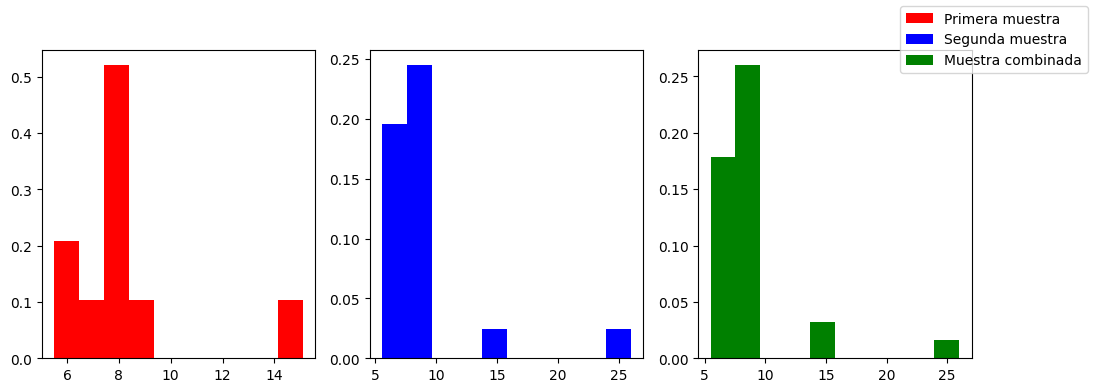

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].hist(x_1, density=True, label="Primera muestra", color="red")
axs[1].hist(x_2, density=True, label="Segunda muestra", color="blue")
axs[2].hist(x, density=True, label="Muestra combinada", color="green")
fig.legend();

Calculamos las medianas muestrales para cada una de las muestras.

In [5]:
print(f"Mediana muestral de la primera muestra: {np.median(x_1)}")
print(f"Mediana muestral de la segunda muestra: {np.median(x_2)}")
print(f"Mediana muestral de la muestra total: {np.median(x)}")

Mediana muestral de la primera muestra: 7.65
Mediana muestral de la segunda muestra: 8.0
Mediana muestral de la muestra total: 7.95


##### a) Prueba con una sola muestra

A continuación se muestra la ayuda que provee la documentación de la clase que se usará.

In [6]:
help(QuantileSignTest)

Help on class QuantileSignTest in module Tests:

class QuantileSignTest(SignTest)
 |  QuantileSignTest(x, quantile, p)
 |  
 |  Clase para implementar la prueba para el p-ésimo cuantil usando
 |  la prueba de los signos.
 |  
 |  Method resolution order:
 |      QuantileSignTest
 |      SignTest
 |      BinomialTest
 |      abc.ABC
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, x, quantile, p)
 |      Constructor de la clase.
 |      
 |      :param x: Observaciones de la variable aleatoria en cuestión.
 |      :param quantile: El cuantil propuesto para los datos.
 |      :param p: El orden del cuantil (entre 0 y 1; e.g si p=0.5 para la mediana).
 |  
 |  run_test(self, alternative, alpha=0.1, exact=True)
 |      Ejecuta la prueba de hipótesis.
 |      
 |      :param alternative: La hipótesis alternativa.
 |                          Opciones:
 |                                  1. "x_p != n_p0"
 |                                  2. "x_p < n_p0"
 |     

Según lo anterior, debemos pasarle un arreglo de datos, el cuantil propuesto y el orden del cuantil.

In [7]:
# Primera muestra
q1 = QuantileSignTest(x=x_1, quantile=9, p=0.5)


Ahora invocamos el método ".run_test()" con todas las alternativas.

In [8]:
q1.run_test(alternative="x_p != n_p0", alpha=0.2)


H_0: x_(0.5) = 9 v.s H_a: x_(0.5) != 9
Rechazar H_0 si K <= 2 o K >= 8
Valor que tomó la estadística 2
-> Rechazamos H_0 con nivel de significancia 5.47%


In [9]:
q1.run_test(alternative="x_p < n_p0", alpha=0.1)


H_0: x_(0.5) = 9 v.s H_a: x_(0.5) < 9
Rechazar H_0 si K <= 2
Valor que tomó la estadística 2
-> Rechazamos H_0 con nivel de significancia 5.47%


In [10]:
q1.run_test(alternative="x_p > n_p0", alpha=0.1)

H_0: x_(0.5) = 9 v.s H_a: x_(0.5) > 9
Rechazar H_0 si K >= 8
Valor que tomó la estadística 2
-> No rechazamos H_0 con nivel de significancia 5.47%


De la primera prueba (H_0: x_(0.5) = 9 v.s H_a: x_(0.5) != 9) podemos concluir que los datos no proveen suficiente evidencia de que la mediana poblacional sea $9$.

Por otro lado, de las otras dos pruebas podemos concluir que los datos sugieren que la mediana poblacional es menor que $9$.

In [11]:
# Segunda muestra
q2 = QuantileSignTest(x=x_2, quantile=9, p=0.5)


Invocamos el método ".run_test()" con todas las alternativas.

In [12]:
q2.run_test(alternative="x_p != n_p0", alpha=0.2)


H_0: x_(0.5) = 9 v.s H_a: x_(0.5) != 9
Rechazar H_0 si K <= 6 o K >= 14
Valor que tomó la estadística 3
-> Rechazamos H_0 con nivel de significancia 5.77%


In [13]:
q2.run_test(alternative="x_p < n_p0", alpha=0.1)


H_0: x_(0.5) = 9 v.s H_a: x_(0.5) < 9
Rechazar H_0 si K <= 6
Valor que tomó la estadística 3
-> Rechazamos H_0 con nivel de significancia 5.77%


In [14]:
q2.run_test(alternative="x_p > n_p0", alpha=0.1)

H_0: x_(0.5) = 9 v.s H_a: x_(0.5) > 9
Rechazar H_0 si K >= 14
Valor que tomó la estadística 3
-> No rechazamos H_0 con nivel de significancia 5.77%


De la primera prueba podemos concluir que los datos no proveen suficiente evidencia de que la mediana poblacional sea $9$.

Por otro lado, de las otras dos pruebas podemos concluir que los datos sugieren que la mediana poblacional es menor que $9$.

In [15]:
# Con la ambas muestra
q3 = QuantileSignTest(x=x, quantile=9, p=0.5)


In [16]:
q3.run_test(alternative="x_p != n_p0", alpha=0.1)


H_0: x_(0.5) = 9 v.s H_a: x_(0.5) != 9
Rechazar H_0 si K <= 10 o K >= 20
Valor que tomó la estadística 5
-> Rechazamos H_0 con nivel de significancia 4.94%


In [17]:
q3.run_test(alternative="x_p < n_p0", alpha=0.05)


H_0: x_(0.5) = 9 v.s H_a: x_(0.5) < 9
Rechazar H_0 si K <= 10
Valor que tomó la estadística 5
-> Rechazamos H_0 con nivel de significancia 4.94%


In [18]:
q3.run_test(alternative="x_p > n_p0", alpha=0.05)


H_0: x_(0.5) = 9 v.s H_a: x_(0.5) > 9
Rechazar H_0 si K >= 20
Valor que tomó la estadística 5
-> No rechazamos H_0 con nivel de significancia 4.94%


Como en los casos anteriores, los datos no contiene evidencia suficiente para afirmar que la mediana poblacional sea $9$, y sugieren que la mediana es menor que 9.

##### b) Intervalo de confianza para ambas muestras

Considere una muestra aleatoria $X_1,\ldots X_n \sim F_X$, con $M$ la mediana de $F_X$.

Un intervalo de confianza para $M$, con nivel de cobertura $\gamma$, es un intervalo aleatorio $[L(\underline{X}), U(\underline{X})]$ tal que

$$
    \mathbb{P}(L(\underline{X}) \leq M \leq U(\underline{X})) \geq \gamma
$$

donde $L, U$ son funciones de la muestra.

Para encontrar el intervalo usaremos el siguiente teorema.

**Teorema**: Sea $X_1,\ldots X_n$ una muestra aleatoria de una distribución continua con p-ésimo cuantil $\eta_p$, $0<p<1$, y sean $X_{(1)},\ldots,X_{(n)}$ las estadísticas de orden de la muestra. Entonces, para cualesquiera $r,s \in \mathbb{Z}$, tales que $1\leq r < s \leq n$,

$$
    \mathbb{P}(X_{(r)} \leq \eta_p \leq X_{(s)}) = \sum_{k=r}^{s-1} \binom{n}{k}p^{k}(1-p)^{n-k}
$$

La demostración puede leerse en [Nonparametric Methods](https://link.springer.com/chapter/10.1007/978-3-030-55156-8_14).

Si $L(\underline{X}) = X_{(r)}$ y $U(\underline{X}) = X_{(s)}$, el problema se traduce a encontrar $r, s$ tales que,

$$
  \mathbb{P}(X_{(r)}  \leq M \leq X_{(s)}) = \sum_{k=r}^{s-1} \binom{n}{k}p^{k}(1-p)^{n-k} \geq \gamma  
$$

En nuestro problema, $n=30$, $p=0.5$, y $\gamma=0.95$, por lo que,

$$
  \mathbb{P}(X_{(r)}  \leq M \leq X_{(s)}) = \sum_{k=r}^{s-1} \binom{30}{k}(0.5)^{30} \geq 0.95
$$

In [19]:
def ci_coverage(r, s):
    prob = 0
    for i in range(r, s):
        prob += stats.binom.pmf(k=i, n=30, p=0.5)
        
    return prob


In [20]:
ci_coverage(10, 23)

0.9760015876963736

In [21]:
ci_coverage(11, 25)

0.9504689695313574

La función 'ci_coverage()" calcula la suma buscada desde el índice $r$ hasta el $s-1$. Con $r=11$ y $s=25$, obtenemos que la cobertura del intervalo es aproximadamente 0.95, como se buscaba.

Solo falta encontrar $X_{(11)}$ y $X_{(25)}$, que son los extremos del intervalo de confianza.

In [22]:
ordered_data = np.sort(x)
x_11, x_25 = ordered_data[10], ordered_data[24]

print(f"El intervalo de confianza es [{x_11},{x_25}].")

El intervalo de confianza es [7.5,8.7].


### Ejercicio 2

I. Geffen, Bradshaw and Nettleton (1973) querían saber si ciertos números presentados de manera aleatoria se percivían más rápidamente por el campo visual del ojo derecho (RVF) o por el izquierdo (LVF), o si no había una
diferencia consistente. A cada uno de $12$ sujetos se les midio el tiempo medio de respuesta a informacion digital en los dos campos visuales (medidos en microsegundos).
¿Hay evidencia en los datos que apoye una diferecia en la respuesta?

| RVF | LVF |
|-----|-----|
| 564 | 557 |
| 521 | 505 |
| 495 | 465 |
| 564 | 562 |
| 560 | 544 |
| 481 | 448 |
| 545 | 531 |
| 478 | 458 |
| 580 | 560 |
| 484 | 485 |
| 539 | 520 |
| 467 | 445 |


###### Solución

El enunciado sugiere que usemos una prueba de localización para la tendencia central de las muestras.

Primero importamos las clases para la prueba de igualdad basada en rachas y la prueba U.

In [23]:
from Tests import RunsEqualityTest, MannWhitneyTest


Ponemos los datos, creamos histogramas y graficamos las funciones de distribución empíricas para cada muestra.

In [24]:
x_r = np.array([564, 521, 495, 564, 560, 481, 545, 478, 580, 484, 539, 467])
y_l = np.array([557, 505, 465, 562, 544, 448, 531, 458, 560, 485, 520, 445])


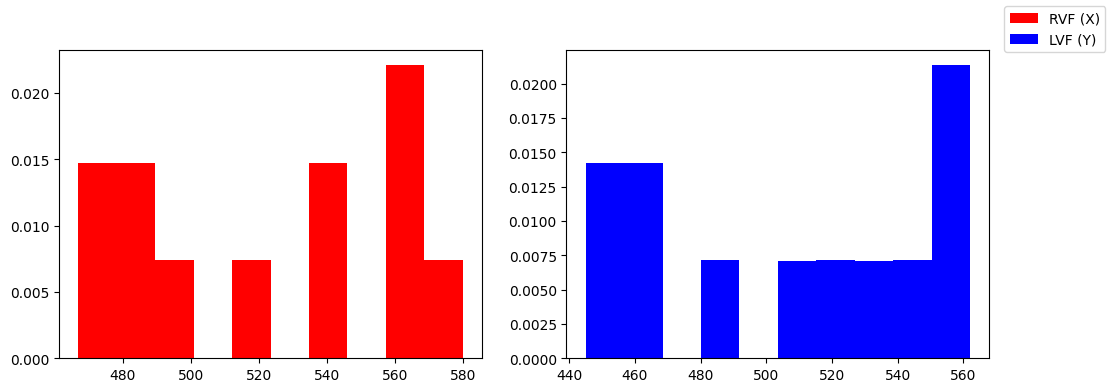

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].hist(x_r, density=True, label="RVF (X)", color="red")
axs[1].hist(y_l, density=True, label="LVF (Y)", color="blue")
fig.legend();

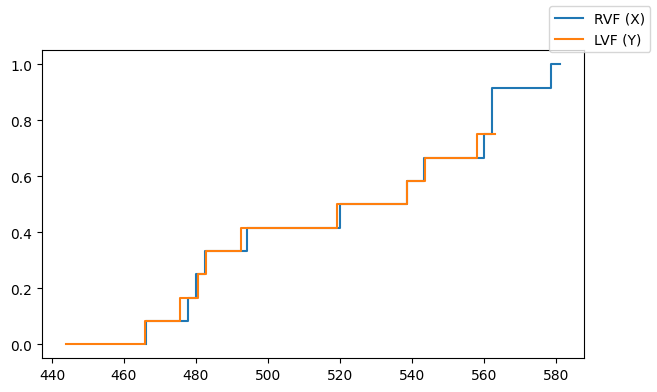

In [26]:
ecdf_x = sm.distributions.ECDF(x_r)
ecdf_y = sm.distributions.ECDF(y_l)

a = np.linspace(min(x_r) - 1, max(x_r) + 1)
cdf_x = ecdf_x(a)

b = np.linspace(min(y_l) - 1, max(y_l) + 1)
cdf_y = ecdf_x(b)

fig, axs = plt.subplots(1, 1, figsize=(7, 4))
axs.step(a, cdf_x, label="RVF (X)")
axs.step(b, cdf_y, label="LVF (Y)")
fig.legend();

Ahora haremos la prueba basada en rachas para probar
$$
    H_0: F_X = F_Y \text{ v.s } H_a: F_X \neq F_Y
$$

In [27]:
runs = RunsEqualityTest(x_r, y_l)


In [28]:
runs.run_test(alpha=0.05, exact=True)


H_0: F_X = F_Y v.s H_a: F_X != F_Y
Rechazar H_0 si: R <= 7
Valor que tomó la estadística: R_obs = 12
-> No rechazamos H_0 con nivel de significancia 2.264%


In [29]:
runs.run_test(alpha=0.05)


H_0: F_X = F_Y v.s H_a: F_X != F_Y
Rechazar H_0 si: Z <= -1.645
Valor que tomó la estadística R: R_obs = 12
Valor que tomó la estadística Z: Z_obs = 0.218
->No rechazamos H_0 con nivel de significancia 5.0%


Tanto la prueba exacta como la asintótica sugieren, que no rechazamos la hipótesis nula, por lo que hay evidencia para afirmar que las distribuciones son iguales, es decir, que no hay diferencia significativa en los tiempos de percepción de los números.

Ahora realizamos pruebas U para comprobar si se obtiene el mismo resultado.

In [30]:
mw_1 = MannWhitneyTest(x_r, y_l)


In [31]:
mw_1.run_test(alternative="F_X > F_Y", alpha=0.05)


H_0: F_X = F_Y v.s H_a: F_X > F_Y
Rechazar H_0: F_X = F_Y si: Z <= -1.645
Valor que tomó la estadística U: U_obs = 78
Valor que tomó la estadística Z: Z_obs = 0.348
->No rechazamos H_0 con nivel de significancia 5.0%


In [32]:
mw_2 = MannWhitneyTest(y_l, x_r)


In [33]:
mw_2.run_test(alternative="F_X > F_Y", alpha=0.05)


H_0: F_X = F_Y v.s H_a: F_X > F_Y
Rechazar H_0: F_X = F_Y si: Z <= -1.645
Valor que tomó la estadística U: U_obs = 43
Valor que tomó la estadística Z: Z_obs = -0.329
->No rechazamos H_0 con nivel de significancia 5.0%


Note que las pruebas sugieren que no rechacemos la hipótesis nula a favor de las alternativas ($F_X < F_Y$ o $F_x > F_Y$), por lo que esta prueba también sugiere que las distribuciones son iguales.

### Ejercicio 3

Una psicóloga quiere saber si las mujeres se molestan más que los hombres cuando hay retrasos en su admisión al hospital para someterse a una cirugía de rutina. Se desarrolla un índice de ansiedad y se mide a los pacientes una
semana antes de la admision programada; este se mide a $17$ hombres y a $23$ mujeres. 
El índice oscila entre $1$ y $40$ en una escala de incremento de ansiedad. La suma de rangos de los $17$ hombres es $428$. ¿Hay evidencia en los datos de que la ansiedad dependa del sexo? Si la hay, ¿que género biológico presenta más ansiedad?  ́

###### Solución

Considere las variables aleatorias $X$: "Índice de ansiedad en hombres", y $Y$: "Índice de ansiedad en mujeres". 
Por hipótesis, 

$$
    Sop(X) = Sop(Y) = \{1,\ldots,40\}
$$

Como el índice se midió en 17 hombres y 23 mujeres, tenemos las siguientes muestras.

$$
    X_1,\ldots X_{17}\\
    Y_1,\ldots, Y_{23}
$$

Además, por hipótesis sabemos que 

$$
    \sum_{i=1}^{17}Rango(X_i) = 428
$$

Note que esta suma de rangos se calcula una vez que la muestra ha sido mezclada y ordenada.

Para responder a la primera pregunta (¿Hay evidencia en los datos de que la ansiedad dependa del sexo?), vamos a probar

$$
    H_0: F_X = F_Y \text{ v.s } H_a: F_X \neq F_Y
$$

En palabras, $H_0$ se interpreta como que el índice de ansiedad no depende del sexo, mientras que $H_a$ como que el índice sí depende del sexo.

Como tenemos la suma de rangos de las $X's$, usaremos la prueba de Wilcoxon.La regla de decisión es 

"Rechazar $H_0$ si $W_N(Z) \leq c_{1}$ o si $W_N(Z) \geq c_{2}$"

o, en términos de la estadística $W_N(Z)$ estandarizada,

$$
    \text{"Rechazar } H_0 \text{ si } Z:=\frac{W_N(Z) - \mathbb{E}(W_N(Z))}{\sqrt{\mathbb{V}ar(W_N(Z))}} \leq z_{\alpha /2} \text{ o si } Z:=\frac{W_N(Z) - \mathbb{E}(W_N(Z))}{\sqrt{\mathbb{V}ar(W_N(Z))}}  \geq z_{1-\alpha/2}"
$$

con $\mathbb{E}(W_N(Z)) = \frac{n_1(n+1)}{2}$ y $\mathbb{V}ar(W_N(Z)) = \frac{n_1 n_2 (n+1)}{12}$.


En este caso $n_1 = 17$, $n_2 = 23$, $n=40$, $\mathbb{E}(W_N(Z))=348.5$ y $\mathbb{V}ar(W_N(Z))\approx 1335.9$. 
Haciendo el cálculo se obtiene $Z_{\text{obs}}\approx 2.17$.

Con $\alpha=0.05$, $z_{\alpha/2}\approx -1.95$ y $z_{1-\alpha/2}\approx 1.95$.

Como $2.17 = Z_{\text{obs}} \geq z_{1-\alpha/2} = 1.96$, rechazamos $H_0$, es decir, los datos indican que el índice de ansidad sí depende del sexo.

Para probar la hipótesis nula contra $H_a: F_X > F_Y$, comparamos $Z_{\text{obs}} = 2.17$ con $z_{\alpha}=-1.64$: como $Z_{\text{obs}} > z_{\alpha}$, no rechazamos $H_0$.

Para probar la hipótesis nula contra $H_a: F_X < F_Y$, comparamos $Z_{\text{obs}} = 2.17$ con $z_{1-\alpha}=1.64$: como $Z_{\text{obs}} \geq z_{1-\alpha}$, rechazamos $H_0$ a favor de $H_a: F_X < F_Y$, de donde podemos concluir, con nivel del significancia del $5\%$, que $X > Y$ estocásticamente, es decir, que los hombres tienen a sufrir mayores índices de ansiedad que las mujeres.

### Ejercicio 4

Un modelo genético sugiere que las probabilidades de un evento trinomial son
$$
\begin{align*}
    p_1 &= p^{2} \\
    p_2 &= 2p(1-p) \\
    p_3 &= (1-p)^{2}
\end{align*}
$$
con $0<p<1$.

Asume que $X_1, X_2$ y $X_3$ representan las frecuencias observadas a cada categoría en una muestra de $n$ ensayos independientes, respectivamente. Obtén una prueba de bondad de ajuste de tipo $\chi ^{2}$ para esta distribución trinomial si $p$ es desconocida.


##### Solución

Queremos probar $H_0: p_1 = p^{2}, p_2 = 2p(1-p), p_3 = (1-p)^{2}$ v.s $H_a: $ No ocurre $H_0$, con $0<p<1$.

Note que la hipótesis nula es compuesta, pues no determina los valores de $p_i$, solo dice que están en términos de un parámetro desconocido, $p$.

De ser claro que hay $k=3$ categorías, para las cuales $X_i$ representa sus frecuencias observadas.

Primero vamos a estimar $p$ usando la muestra $X_1, X_2, X_3$ (resultados de un experimento multinomial).
La función de verosimilitud es

$$
    L(\vec{p}, \underline{X}) \propto (p_1)^{X_1}(p_2)^{X_2} (p_3)^{X_3}
$$

Bajo $H_0$,

$$
    L(\vec{p}, \underline{X}) \propto (p^{2})^{X_1}(2p(1-p))^{X_2} ((1-p)^{2})^{X_3}
$$

Si optimizamos $l(\vec{p})=\ln{(L(\vec{p}, \underline{X}) )}$ respecto a $p$, obtenemos que el punto extremal es 

$$
    \hat{p}_{ML} = \frac{2 X_1 + X_2}{2n}
$$

donde $n = \sum X_i$

Por el teorema de la ji-cuadrada de Fisher, najo $H_0$,
$$
    \chi^{2} = \sum_{i=1}^{3} \frac{(X_i - n\hat{P}_i)^{2}}{n\hat{P}_i} = \sum_{i=1}^{3} \frac{(X_i - n p_i(\hat{p}_{ML})^{2}}{n p_i(\hat{p}_{ML})}
$$

tiene distribución (aproximada) ji-cuadrada con $3-1-1$ grados de libertad (restamos uno más porque estimamos un parámetro).

La regla de decisión es "Rechazar $H_0$ si $\chi^{2} \geq c_{\alpha}$"

### Ejercicio 5

La tabla muestra el número de espectáculos de debutaron en Broadway durante 1998. Pruebe la hipótesis de que el número de espectáculos que abren por mes sigue una distribución Poisson. ¿Cómo podrías explicar el patrón de comportamiento observado tomando en cuenta los patrones de turismo?

|   Mes   | Número de show |    Mes     | Número de show |
|:-------:|:--------------:|:----------:|:--------------:|
|  Enero  |        6       | Julio      |        2       |
| Febrero |        3       | Agosto     |        2       |
|  Marzo  |       15       | Septiembre |        2       |
|  Abril  |       28       | Octubre    |        8       |
|  Mayo   |        1       | Noviembre  |       15       |
|  Junio  |        2       | Diciembre  |       17       |


##### Solución 1 (sin juntar categorías)

Sea $X$ el número de espectáculos que debutan por mes. Queremos determinar si $X\sim Poi(\lambda)$, por lo que haremos la siguiente prueba.

$$
    H_0: X \sim Poi(\lambda) \text{ v.s } H_a: X \not\sim Poi(\lambda) 
$$

Note que si $X\sim Poi(\lambda)$, entonces $sop(X)=\{0,1,2,\ldots \}=\mathbb{N}$. Entoces el experimento consiste en tomar un mes y clasificarlo con un número natural dependiendo de cuántos espectáculos abrieron en ese mes.
Lo anterior nos da la siguiente tabla

<table>
  <tr>
    <td>$X$</td>
    <td>0</td>
    <td>1</td>
    <td>2</td>
    <td>3</td>
    <td>4</td>
    <td>5</td>
    <td>6</td>
    <td>7</td>
    <td>8</td>
    <td>9 o más</td>
  </tr>
  <tr>
    <td>$f_i$</td>
    <td>0</td>
    <td>1</td>
    <td>4</td>
    <td>1</td>
    <td>0</td>
    <td>0</td>
    <td>1</td>
    <td>0</td>
    <td>1</td>
    <td>4</td>
  </tr>
  <tr>
    <td>$e_i$</td>

  </tr>
</table>

Para calcular las frecuencias esperadas, $e_i$, primero hay que estimar el parámetro desconocido, $\lambda$.

El estimador de máxima verosimilitud es
$$
\begin{align*}
\hat{\lambda}_{ML} &= \frac{1}{n}\sum x_i\\
                   &= \frac{1}{12} (0(0) + 1(1) + 2(4) + 3(1)+ \ldots + 8(1) + 9(4))\\
                   &\approx 5.17
\end{align*}
$$

Bajo $H_0$,

$$
\begin{align*}
    e_i &= n p_i = 12 \mathbb{P}(X=i-1), i \in \{1,...,9\}\\
    e_{10} &= 12 \mathbb{P}(X\geq 9)
\end{align*}
$$

In [34]:
observed = np.array([0, 1, 4, 1, 0, 0, 1, 0, 1, 4])
expected = np.zeros(observed.shape)

l = 0
for i in range(len(observed)):
    l += i * observed[i]
l /= 12

print(f"Parámetro estimado: {l:.2f}")


Parámetro estimado: 5.17


In [35]:
for x in range(0, 10):
    if x < 9:
        e = 12 * stats.poisson.pmf(x, mu=l)
        expected[x] = e
    else:
        e = 12 * (1 - stats.poisson.cdf(x-1, mu=l))
        expected[x] = e


print(f"Frecuencias esperadas\n", expected)

Frecuencias esperadas
 [0.06844259 0.35362004 0.91351843 1.57328174 2.03215558 2.0998941
 1.80824214 1.33465492 0.86196463 0.95422582]


Con lo anterior podemos llenar la tabla
<table>
  <tr>
    <td>$X$</td>
    <td>0</td>
    <td>1</td>
    <td>2</td>
    <td>3</td>
    <td>4</td>
    <td>5</td>
    <td>6</td>
    <td>7</td>
    <td>8</td>
    <td>9 o más</td>
  </tr>
  <tr>
    <td>$f_i$</td>
    <td>0</td>
    <td>1</td>
    <td>4</td>
    <td>1</td>
    <td>0</td>
    <td>0</td>
    <td>1</td>
    <td>0</td>
    <td>1</td>
    <td>4</td>
  </tr>
  <tr>
    <td>$e_i$</td>
    <td>0.0684</td>
    <td>0.3536</td>
    <td>0.9135</td>
    <td>1.5732</td>
    <td>2.0321</td>
    <td>2.0998</td>
    <td>1.8082</td>
    <td>1.3346</td>
    <td>0.8619</td>
    <td>0.9542</td>
  </tr>
</table>

Finalmente, calculamos la estadística de prueba

In [36]:
def chi2(o, e):
    assert o.size == e.size
    k = o.size
    jiji = 0
    
    for i in range(k):
        jiji += ((e[i] - o[i])**2) / e[i]
        
    return jiji

In [37]:
chi2(observed, expected)

27.45888990005429

Es decir, $\chi ^{2}_{\text{obs}} = 27.45$.

Si calculamos el p-valor como $p_{\text{val}} = \mathbb{P}(\chi^{2} \geq \chi ^{2}_{\text{obs}})$, obtenemos $p_{\text{val}} = 0.00059$, el cual es suficientemente bajo como para rechazar $H_0$ con significancia baja.

In [38]:
# df = 10 - 1 - 1 = 8
stats.chi2.sf(27.45, df=8)

0.0005909610528784581

##### Solución 2 (juntando categorías)

Para seguir la regla de que para toda $i\in\{1,\ldots,k\}$, $e_i \geq 5$ (o al menos cercanas a 5), vamos a crear categorías usando los cuantiles $q_{1/3}\left(Poi(\frac{101}{12})\right)$ y $q_{2/3}\left(Poi(\frac{101}{12})\right)$ para particionar el soporte de la distribución Poisson en 3 partes (casi)-equiprobables (como la poisson es discreta, no es posible hacerlo exactamente).

Con estos cuantiles las categorías son $C_1 = \{0, 1, \ldots, 6, 7 \}$, $C_2 = \{8, 9, 10\}$ y $C_3 = \{11, 12, \ldots\}$. Las probabilidades (bajo $H_0$) de cada categoría son $p_1 = 0.3964$, $p_2 = 0.3760$, $p_3 = 0.2276$.

<table>
  <tr>
    <td>$X$</td>
    <td>$C_1$</td>
    <td>$C_2$</td>
    <td>$C_3$</td>
  </tr>
  <tr>
    <td>$f_i$</td>
    <td>7</td>
    <td>1</td>
    <td>4</td>
  </tr>
  <tr>
    <td>$e_i$</td>
    <td>4.7568</td>
    <td>0.3760</td>
    <td>0.2276</td>
  </tr>
</table>

In [39]:
f = np.array([7, 1, 4])
e = np.array([4.7568, 0.3760, 0.2276])
chi2(f, e)

64.61978695740758

In [87]:
stats.chi2.sf(64.61, df=1)

9.129086674947777e-16

De donde concluimos que rechazamos $H_0$.

Con ambas soluciones se rechaza $H_0$, por lo que se concluye que el número de espectáculos que debutan por mes no se distribuye Poisson. Lo anterior tiene sentido porque los patrones de turismo están asociados a las vacaciones, las cuales, a grandes rasgos, ocurren dos veces al año, por lo que la distribución real de los datos debería ser multimodal, no unimodal como la distribución Poisson.

### Ejercicio 6

La oficina de correos quiere determinar si hay una relación entre el peso en kilogramos de la correspondencia de un día y el número de empleados que se requiere para procesarla. ¿Que concluirías dada la siguiente tabla?


| Peso | Empleados |
|:----:|:---------:|
|  13  |     14    |
|  10  |      8    |
|   7  |      5    |
|  12  |      9    |
|  14  |     10    |
|  9.5 |      6    |
| 15.5 |     13    |
| 16.5 |      6    |


###### Solución

Vamos a crear dos categorías para cada variable. Si $X$ indica el peso, entonces clasificamos estos datos entre "12 kg o más" y "Más de 12 kg"; si $Y$ indica el número de empleados, clasificamos estos datos en "9 empleados o menos" y "10 o más empleados".

In [40]:
from Tests import IndependenceTest

In [41]:
Y = ["12 kg o menos", "Más de 12 kg"]
X = ["9 empleados o menos", "10 o más empleados"]
table = np.array([[4, 1], [0, 3]])
data = pd.DataFrame(table, columns=Y, index=X)

In [42]:
it = IndependenceTest(data)
print(it)

Tabla de contingencia de 2 x 2

                     12 kg o menos  Más de 12 kg
9 empleados o menos              4             1
10 o más empleados               0             3


La celda anterior muestra la tabla de contingencia creada usando estas categorías.

Ahora realizamos una prueba al $5\%$

In [43]:
it.run_test(alpha=0.05)

H_0: 'Las variables son independientes' v.s H_a: 'Las variables están asociadas'
Rechazar H_0 si: jiji > 3.841
Valor que tomó la estadística jiji: 4.800
-> Rechazamos H_0 con nivel de significancia 5.0%

***** MEDIDAS DE ASOCIACIÓN *****

Medida phi (valores grandes indican mayor asociación): 0.6000
Coeficiente de contingencia en media cuadrática (0: independientes | 1: completamente asociados): 0.5145
Índice de T... (valores grandes indican mayor asociación): 0.6000
V de Cramer (valores grandes indican mayor asociación): 0.6000


De lo anterior concluimos que las variables están asociadas, es decir, que el número de empleados que se requieren para procesar la correspondencia de un día, depende del peso de la misma.

### Ejercicio 7

En una muestra nacional de una encuesta realizada por la Secretaría de Educacion Pública y Desarrollo Social, se obtuvo la informacion sobre algunas características de los hogares en Mexico. ¿Existe alguna relación entre las variables escolaridad alcanzada por el jefe de hogar y el tipo de piso en la casa? En caso de existir, ¿qué tan fuerte es la asociacion?

<table>
  <tr>
    <td>&nbsp;</td>
    <td>Primaria incompleta</td>
    <td>Primaria completa</td>
    <td>Secundaria completa</td>
    <td>Más de secundaria</td>
  </tr>
  <tr>
    <td>Piso de tierra</td>
    <td>278</td>
    <td>625</td>
    <td>376</td>
    <td>258</td>
  </tr>
  <tr>
    <td>Piso de cemento</td>
    <td>488</td>
    <td>1443</td>
    <td>1405</td>
    <td>2802</td>
  </tr>
  <tr>
    <td>Piso de mosaico</td>
    <td>47</td>
    <td>235</td>
    <td>405</td>
    <td>1448</td>
  </tr>
</table>


In [44]:
Y = ["Primaria inc", "Primaria com.", "Secundaria com.", "Más de sec."]
X = ["Piso de tierra", "Piso de cemento", "Piso de mosaico"]
table = np.array([[278, 625, 376, 258], [488, 1443, 1405, 2802], [47, 235, 405, 1448]])
data = pd.DataFrame(table, columns=Y, index=X)

In [45]:
it2 = IndependenceTest(data)
print(it2)

Tabla de contingencia de 3 x 4

                 Primaria inc  Primaria com.  Secundaria com.  Más de sec.
Piso de tierra            278            625              376          258
Piso de cemento           488           1443             1405         2802
Piso de mosaico            47            235              405         1448


In [46]:
it2.run_test(0.05)

H_0: 'Las variables son independientes' v.s H_a: 'Las variables están asociadas'
Rechazar H_0 si: jiji > 12.592
Valor que tomó la estadística jiji: 1130.853
-> Rechazamos H_0 con nivel de significancia 5.0%

***** MEDIDAS DE ASOCIACIÓN *****

Medida phi (valores grandes indican mayor asociación): 0.1153
Coeficiente de contingencia en media cuadrática (0: independientes | 1: completamente asociados): 0.1145
Índice de T... (valores grandes indican mayor asociación): 0.0471
V de Cramer (valores grandes indican mayor asociación): 0.0815


### Ejercicio 8

Simula $10$ observaciones de una distribución normal con media $2$ y varianza $4$. 
Considere las hipótesis:

$$
\begin{align}
    H_0 : F_X(x) &\text{ es una distribución normal}\\
        &\text{v.s} \\
    H_a : F_X(x) &\text{ no es una distribución normal}
\end{align}
$$

Considera las pruebas de Kolmogorov-Smirnov, Anderson-Darling, Shapiro-Wilks y Cramer Von Mises para probar la hipótesis. ¿Todas las pruebas coinciden en la decisión? ¿Qué concluirías con $\alpha=0.10$?


In [47]:
# Simulamos los 10 datos
data_8 = stats.norm.rvs(loc=2, scale=2, size=10, random_state=1)


In [48]:
# Pruba de Kolmogorov-Smirnov
stats.ks_1samp(data_8, cdf=stats.norm.cdf, args=(2, 2))


KstestResult(statistic=0.20130993331805813, pvalue=0.7419720433081503, statistic_location=0.9436564954730886, statistic_sign=1)

In [49]:
# Prueba de Anderson-Darling
stats.anderson(data_8)


AndersonResult(statistic=0.24844826962238287, critical_values=array([0.501, 0.57 , 0.684, 0.798, 0.95 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=1.8057182183878002, scale=2.5106345911456978)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [50]:
# Prueba de Shapiro-Wilks
stats.shapiro(data_8)


ShapiroResult(statistic=0.9563897252082825, pvalue=0.7440548539161682)

In [51]:
# Prueba de Cramer von Mises
stats.cramervonmises(data_8, cdf=stats.norm.cdf, args=(2,2))


CramerVonMisesResult(statistic=0.07542863084681138, pvalue=0.7296954066333936)

Para concluir, necesitamos comparar los valores p obtenidos con $\alpha = 0.1$.

- La prueba KS nos da $p_{value} = 0.74$, como $p_{value} \leq \alpha= 0.1$ no es cierto, no rechazamos $H_0$.
- La prueba de Anderson-Darling nos da un valor crítico $0.57$ al nivel $10\%$, y como la estadística de prueba toma el valor $0.24$ no es mayor, no rechazamos $H_0$.
- La prueba de Shapiro-Wilks nos da $p_{value} = 0.74$, como $p_{value} \leq \alpha= 0.1$ no es cierto, no rechazamos $H_0$.
- La prueba de Cramer von Mises nos da $p_{value} = 0.72$, como $p_{value} \leq \alpha= 0.1$ no es cierto, no rechazamos $H_0$.

Todas las pruebas indican que la distribución de los datos es normal.

### Ejercicio 9

Simula $n=10$ observaciones de una distribución t-Student con $3$ grados de libertad. 
Considere las hipótesis:

$$
\begin{align}
    H_0 : F_X(x) &\text{ es una distribución normal}\\
        &\text{v.s} \\
    H_a : F_X(x) &\text{ no es una distribución normal}
\end{align}
$$

Considera las pruebas de Kolmogorov-Smirnov, Anderson-Darling, Shapiro-Wilks y Cramer Von Mises para probar la hipótesis. ¿Todas las pruebas coinciden en la decisión? ¿Qué concluirías con $\alpha=0.10$? Si aumentas $n$, ¿qué puedes decir sobre las pruebas? Nota: Prueba varios valores para $n$.


In [52]:
# Simulamos 10 datos
data_9 = stats.t.rvs(df=3, size=10, random_state=1)


In [53]:
# Pruba de Kolmogorov-Smirnov
stats.ks_1samp(data_9, cdf=stats.norm.cdf, args=(np.mean(data_9), np.var(data_9)))


KstestResult(statistic=0.18277894994436888, pvalue=0.834423859795508, statistic_location=-0.3140591904507586, statistic_sign=1)

In [54]:
# Prueba de Anderson-Darling
stats.anderson(data_9)


AndersonResult(statistic=0.33418977045048415, critical_values=array([0.501, 0.57 , 0.684, 0.798, 0.95 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.03046699607685901, scale=1.3533450880899405)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [55]:
# Prueba de Shapiro-Wilks
stats.shapiro(data_9)


ShapiroResult(statistic=0.9322486519813538, pvalue=0.47037145495414734)

In [56]:
# Prueba de Cramer von Mises
stats.cramervonmises(data_9, cdf=stats.norm.cdf, args=(np.mean(data_9), np.var(data_9)))


CramerVonMisesResult(statistic=0.060070183885201064, pvalue=0.8248664113345106)

Para concluir, necesitamos comparar los valores p obtenidos con $\alpha = 0.1$.

- La prueba KS nos da $p_{value} = 0.83$, como $p_{value} \leq \alpha= 0.1$ no es cierto, no rechazamos $H_0$.
- La prueba de Anderson-Darling nos da un valor crítico $0.57$ al nivel $10\%$, y como la estadística de prueba toma el valor $0.33$ no es mayor, no rechazamos $H_0$.
- La prueba de Shapiro-Wilks nos da $p_{value} = 0.47$, como $p_{value} \leq \alpha= 0.1$ no es cierto, no rechazamos $H_0$.
- La prueba de Cramer von Mises nos da $p_{value} = 0.82$, como $p_{value} \leq \alpha= 0.1$ no es cierto, no rechazamos $H_0$.

Todas las pruebas indican que la distribución de los datos es normal (de manera errónea).

Ahora incrementaremos la cantidad de datos.

Con 50 datos

In [57]:
data_9_1 = stats.t.rvs(df=3, size=50, random_state=1)


In [58]:
# Pruba de Kolmogorov-Smirnov con 50 datos
stats.ks_1samp(data_9_1, cdf=stats.norm.cdf, args=(np.mean(data_9_1), np.var(data_9_1)))


KstestResult(statistic=0.21218142730485323, pvalue=0.01872836851026838, statistic_location=0.8235072974684677, statistic_sign=1)

In [59]:
# Prueba de Anderson-Darling con 50 datos
stats.anderson(data_9_1)


AndersonResult(statistic=1.2456674427890846, critical_values=array([0.538, 0.613, 0.736, 0.858, 1.021]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.09331104597570049, scale=1.4013174124419754)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [60]:
# Prueba de Shapiro-Wilks con 50 datos
stats.shapiro(data_9_1)


ShapiroResult(statistic=0.8979959487915039, pvalue=0.00041285311453975737)

In [61]:
# Prueba de Cramer von Mises con 50 datos
stats.cramervonmises(data_9_1, cdf=stats.norm.cdf, args=(np.mean(data_9_1), np.var(data_9_1)))


CramerVonMisesResult(statistic=0.5131561527061785, pvalue=0.0364628724605226)

Podemos notar que la prueba KS indica (erróneamente) que no rechazamos la hipótesis nula (i.e que son datos se distribuyen de manera normal), mientras que las pruebas de Shapiro-Wilks, Anderson-Darling y de Cramer von Mises sugieren correctamente que rechazamos la hipótesis nula.

Ahora con 100 datos

In [62]:
data_9_2 = stats.t.rvs(df=3, size=100, random_state=1)

In [63]:
# Pruba de Kolmogorov-Smirnov con 100 datos
stats.ks_1samp(data_9_2, cdf=stats.norm.cdf, args=(np.mean(data_9_2), np.var(data_9_2)))


KstestResult(statistic=0.22565556555864663, pvalue=5.8951444377911264e-05, statistic_location=1.1817343613067341, statistic_sign=1)

In [64]:
# Prueba de Anderson-Darling con 100 datos
stats.anderson(data_9_2)


AndersonResult(statistic=3.409261176988707, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.2696372412629305, scale=1.638001174676979)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [65]:
# Prueba de Shapiro-Wilks con 100 datos
stats.shapiro(data_9_2)


ShapiroResult(statistic=0.8213533163070679, pvalue=1.1851882808500136e-09)

In [66]:
# Prueba de Cramer von Mises con 50 datos
stats.cramervonmises(data_9_2, cdf=stats.norm.cdf, args=(np.mean(data_9_2), np.var(data_9_2)))


CramerVonMisesResult(statistic=1.796153211273541, pvalue=3.251286385119734e-05)

Con más datos, todas las pruebas coinciden en que los datos no siguen una distribución normal.

### Ejercicio 10

Repite los ejercicios 8 y 9 para muestras de tamaño $100$.

Ejercicio 8

In [67]:
data_10_1 = stats.norm.rvs(loc=2, scale=2, size=100, random_state=1)

In [68]:
stats.ks_1samp(data_10_1, cdf=stats.norm.cdf, args=(2, 2))

KstestResult(statistic=0.08326674852986454, pvalue=0.467124170460156, statistic_location=0.4775861982097944, statistic_sign=-1)

In [69]:
stats.anderson(data_10_1)

AndersonResult(statistic=0.21965088555943169, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=2.121165704151397, scale=1.7792309346248243)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [70]:
stats.shapiro(data_10_1)

ShapiroResult(statistic=0.9920045137405396, pvalue=0.8215526342391968)

In [71]:
stats.cramervonmises(data_10_1, cdf=stats.norm.cdf, args=(2,2))

CramerVonMisesResult(statistic=0.1054312265262902, pvalue=0.5597636233763312)

Ejercicio 9

In [72]:
data_10_2 = stats.t.rvs(df=3, size=100, random_state=1)

In [73]:
stats.ks_1samp(data_10_2, cdf=stats.norm.cdf, args=(np.mean(data_10_2), np.var(data_10_2)))

KstestResult(statistic=0.22565556555864663, pvalue=5.8951444377911264e-05, statistic_location=1.1817343613067341, statistic_sign=1)

In [74]:
stats.anderson(data_10_2)

AndersonResult(statistic=3.409261176988707, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.2696372412629305, scale=1.638001174676979)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [75]:
stats.shapiro(data_10_2)

ShapiroResult(statistic=0.8213533163070679, pvalue=1.1851882808500136e-09)

In [76]:
stats.cramervonmises(data_10_2, cdf=stats.norm.cdf, args=(np.mean(data_10_2), np.var(data_10_2)))

CramerVonMisesResult(statistic=1.796153211273541, pvalue=3.251286385119734e-05)